MSASA 494(LAB)
> Soumitro Mukherjee
Reg. No.: 213001818010030
Roll No.: 30018021030

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Data1 (1).csv")
data

,Date,Closing Price,Gold Price,Oil Price,M3,Exchange Rate,Interest Rate
0,Feb-02,3562.31,14465.5,972.86,14.19164,30.415,6.50
1,Mar-02,3469.35,14702.3,1152.20,14.01346,30.574,6.50
2,Apr-02,3338.16,15080.2,1244.02,14.08145,31.209,6.50
3,May-02,3125.73,16006.7,1257.83,17.20787,31.970,6.50
4,Jun-02,3244.70,15561.9,1199.06,16.27839,32.170,6.50
...,...,...,...,...,...,...,...
186,Aug-17,31730.49,83855.2,3194.46,5.50563,51.222,6.25
187,Sep-17,31283.72,83812.1,3413.19,5.66959,52.376,6.25
188,Oct-17,33213.13,82269.2,3574.53,6.68857,50.248,6.25
189,Nov-17,33149.35,82547.3,3887.81,6.97587,50.006,6.25


In [4]:
data.dtypes

Date              object
Closing Price    float64
Gold Price       float64
Oil Price        float64
M3               float64
Exchange Rate    float64
Interest Rate    float64
dtype: object

In [5]:
data.isna().sum()

Date             0
Closing Price    0
Gold Price       0
Oil Price        0
M3               0
Exchange Rate    0
Interest Rate    0
dtype: int64

In [6]:
data.describe()

,Closing Price,Gold Price,Oil Price,M3,Exchange Rate,Interest Rate
count,191.000000,191.000000,191.000000,191.000000,191.00000,191.000000
mean,16271.865236,52145.140314,3462.208848,15.062906,44.17555,6.825916
std,8425.124715,27456.514056,1542.312679,4.139020,7.99439,1.212380
min,2949.320000,14465.500000,972.860000,5.505630,30.41500,6.000000
25%,9245.325000,24882.900000,2413.575000,12.260000,37.71850,6.000000
50%,17193.550000,50606.800000,3290.460000,14.540310,44.02000,6.000000
75%,21142.320000,79116.550000,4648.805000,17.793365,50.96300,7.750000
max,34056.830000,93885.800000,6926.830000,23.924470,62.35400,10.250000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sb

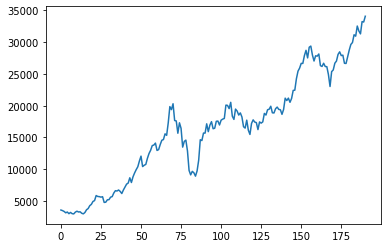

In [8]:
plt.plot(data['Closing Price'])

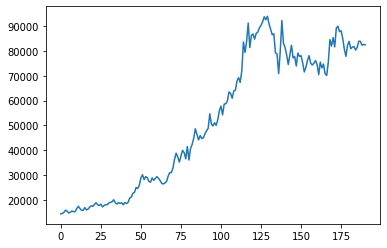

In [9]:
plt.plot(data['Gold Price'])

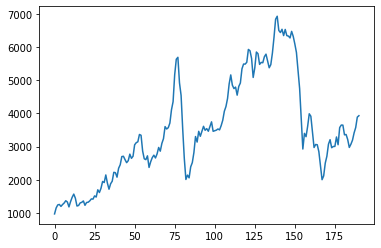

In [10]:
plt.plot(data['Oil Price'])

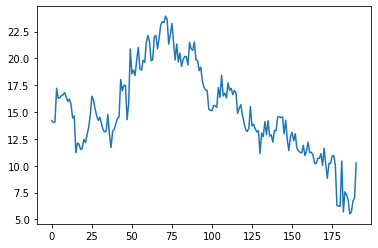

In [11]:
plt.plot(data['M3'])

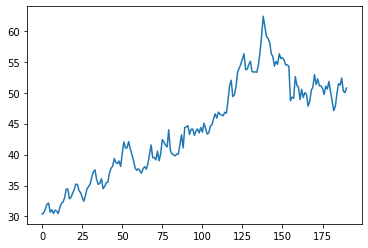

In [12]:
plt.plot(data['Exchange Rate'])

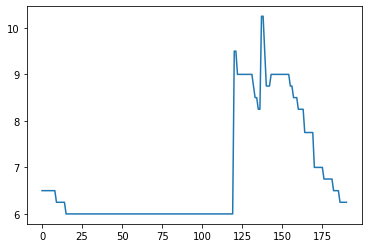

In [13]:
plt.plot(data['Interest Rate'])

<AxesSubplot:xlabel='Oil Price', ylabel='Closing Price'>

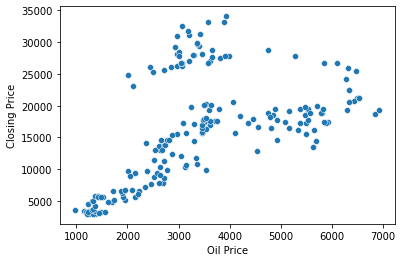

In [15]:
sb.scatterplot(x='Oil Price',y='Closing Price',data=data)

<AxesSubplot:xlabel='M3', ylabel='Closing Price'>

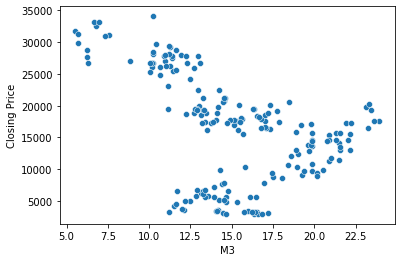

In [16]:
sb.scatterplot(x='M3',y='Closing Price',data=data)

<AxesSubplot:xlabel='M3', ylabel='Exchange Rate'>

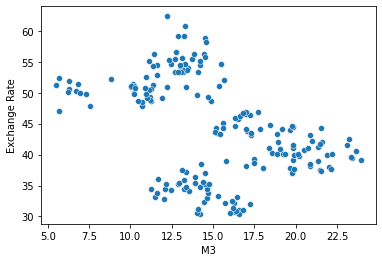

In [17]:
sb.scatterplot(x='M3',y='Exchange Rate',data=data)

<AxesSubplot:xlabel='M3', ylabel='Closing Price'>

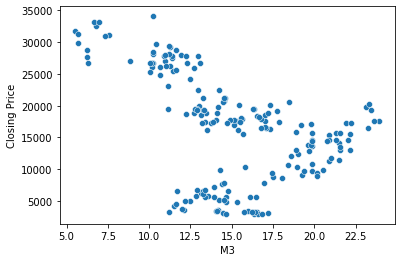

In [18]:
sb.scatterplot(x='M3',y='Closing Price',data=data)

<AxesSubplot:xlabel='Interest Rate', ylabel='Closing Price'>

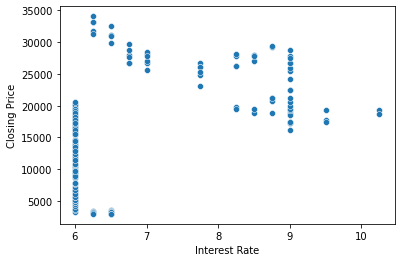

In [19]:
sb.scatterplot(x='Interest Rate',y='Closing Price',data=data)

<AxesSubplot:xlabel='Interest Rate', ylabel='Count'>

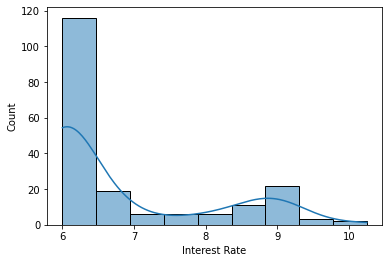

In [20]:
sb.histplot(x='Interest Rate',data=data,kde=True)

It indicates an oscillatory movement towards a converging point over time.

In [21]:
#Dropping the Date Column
data_1=data.drop(['Date'],axis=1)

In [22]:
data_1

,Closing Price,Gold Price,Oil Price,M3,Exchange Rate,Interest Rate
0,3562.31,14465.5,972.86,14.19164,30.415,6.50
1,3469.35,14702.3,1152.20,14.01346,30.574,6.50
2,3338.16,15080.2,1244.02,14.08145,31.209,6.50
3,3125.73,16006.7,1257.83,17.20787,31.970,6.50
4,3244.70,15561.9,1199.06,16.27839,32.170,6.50
...,...,...,...,...,...,...
186,31730.49,83855.2,3194.46,5.50563,51.222,6.25
187,31283.72,83812.1,3413.19,5.66959,52.376,6.25
188,33213.13,82269.2,3574.53,6.68857,50.248,6.25
189,33149.35,82547.3,3887.81,6.97587,50.006,6.25


In [23]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen,VAR

In [24]:
coint_johansen(data_1,-1,1).eig

array([0.13791534, 0.1090065 , 0.06641891, 0.0457662 , 0.03643257,
       0.00573458])

Since, the eigen values are < 1, this indicates the presence of stationarity.

In [25]:
#splotting data in train and test
train = data_1[:int(0.7*(len(data_1)))]
test = data_1[int(0.7*(len(data_1))):]

In [26]:
train.count()

Closing Price    133
Gold Price       133
Oil Price        133
M3               133
Exchange Rate    133
Interest Rate    133
dtype: int64

In [27]:
test.count()

Closing Price    58
Gold Price       58
Oil Price        58
M3               58
Exchange Rate    58
Interest Rate    58
dtype: int64

### For the Multivariate Timeseries, VAR model is going to be fitted

In [28]:
Multi_model = VAR(endog=train)
Multi_model_fit = Multi_model.fit()

In [29]:
Multi_model_fit.y

array([[3.562310e+03, 1.446550e+04, 9.728600e+02, 1.419164e+01,
        3.041500e+01, 6.500000e+00],
       [3.469350e+03, 1.470230e+04, 1.152200e+03, 1.401346e+01,
        3.057400e+01, 6.500000e+00],
       [3.338160e+03, 1.508020e+04, 1.244020e+03, 1.408145e+01,
        3.120900e+01, 6.500000e+00],
       [3.125730e+03, 1.600670e+04, 1.257830e+03, 1.720787e+01,
        3.197000e+01, 6.500000e+00],
       [3.244700e+03, 1.556190e+04, 1.199060e+03, 1.627839e+01,
        3.217000e+01, 6.500000e+00],
       [2.987650e+03, 1.481820e+04, 1.255670e+03, 1.633327e+01,
        3.070700e+01, 6.500000e+00],
       [3.181230e+03, 1.516140e+04, 1.301250e+03, 1.654781e+01,
        3.109600e+01, 6.500000e+00],
       [2.991360e+03, 1.565090e+04, 1.369920e+03, 1.659123e+01,
        3.046800e+01, 6.500000e+00],
       [2.949320e+03, 1.531890e+04, 1.331610e+03, 1.680651e+01,
        3.101900e+01, 6.500000e+00],
       [3.228820e+03, 1.541330e+04, 1.184180e+03, 1.640875e+01,
        3.087100e+01, 6.250

In [30]:
predict = Multi_model_fit.forecast(Multi_model_fit.y, steps=len(test))

In [31]:
predict

array([[1.88184451e+04, 8.66884909e+04, 5.78488722e+03, 1.28744612e+01,
        5.35633313e+01, 8.71442209e+00],
       [1.88120531e+04, 8.69468983e+04, 5.78039681e+03, 1.30105101e+01,
        5.37392223e+01, 8.68261369e+00],
       [1.88345688e+04, 8.72028873e+04, 5.77399843e+03, 1.31177755e+01,
        5.38732991e+01, 8.65398938e+00],
       [1.88795399e+04, 8.74605702e+04, 5.76746008e+03, 1.32040926e+01,
        5.39770992e+01, 8.62814826e+00],
       [1.89416666e+04, 8.77230201e+04, 5.76197219e+03, 1.32752229e+01,
        5.40596459e+01, 8.60481834e+00],
       [1.90166309e+04, 8.79924566e+04, 5.75829270e+03, 1.33353397e+01,
        5.41279276e+01, 8.58381520e+00],
       [1.91009441e+04, 8.82704062e+04, 5.75686056e+03, 1.33874128e+01,
        5.41872942e+01, 8.56501171e+00],
       [1.91918142e+04, 8.85578388e+04, 5.75788382e+03, 1.34335107e+01,
        5.42417856e+01, 8.54831639e+00],
       [1.92870289e+04, 8.88552838e+04, 5.76140751e+03, 1.34750369e+01,
        5.42944008e+01, 

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
import math

In [34]:
pred = pd.DataFrame(index=range(0,len(predict)),columns=[data_1.columns])
for j in range(0,6):
    for i in range(0, len(predict)):
       pred.iloc[i][j] = predict[i][j]
pred

,Closing Price,Gold Price,Oil Price,M3,Exchange Rate,Interest Rate
0,18818.445095,86688.490855,5784.887216,12.874461,53.563331,8.714422
1,18812.053123,86946.898347,5780.396808,13.01051,53.739222,8.682614
2,18834.568795,87202.887337,5773.998431,13.117775,53.873299,8.653989
3,18879.539852,87460.57022,5767.460081,13.204093,53.977099,8.628148
4,18941.666611,87723.020104,5761.972193,13.275223,54.059646,8.604818
5,19016.630886,87992.456618,5758.292704,13.33534,54.127928,8.583815
6,19100.944146,88270.406162,5756.860557,13.387413,54.187294,8.565012
7,19191.814156,88557.838751,5757.883822,13.433511,54.241786,8.548316
8,19287.028932,88855.283781,5761.407514,13.475037,54.294401,8.533658
9,19384.856614,89162.927088,5767.365249,13.512911,54.347318,8.520975


In [35]:
#check rmse
for i in data_1.columns:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], test[i])))

rmse value for Closing Price is :  5975.726959940235
rmse value for Gold Price is :  18728.735406994685
rmse value for Oil Price is :  2577.3300323903395
rmse value for M3 is :  3.652950430006263
rmse value for Exchange Rate is :  5.937639929781941
rmse value for Interest Rate is :  1.4274550943807096


Here, the RMSE values are not good for Closing Price,  Gold Price and Oil Price which indicates bad fits of our model.

In [36]:
#Fitting the entire data on our model
model = VAR(endog=data_1)
model_fit = model.fit()

In [59]:
forecast_upto15 = model_fit.forecast(model_fit.y, steps=15)
forecast_upto15

array([[3.40797007e+04, 8.32408079e+04, 3.91879335e+03, 1.05691903e+01,
        5.08656259e+01, 6.28695736e+00],
       [3.40967472e+04, 8.40594817e+04, 3.91522520e+03, 1.08300029e+01,
        5.09877819e+01, 6.31787496e+00],
       [3.41099032e+04, 8.48588624e+04, 3.91905102e+03, 1.10417895e+01,
        5.11164029e+01, 6.34446399e+00],
       [3.41206384e+04, 8.56401718e+04, 3.92918735e+03, 1.12125616e+01,
        5.12507293e+01, 6.36808107e+00],
       [3.41300761e+04, 8.64043832e+04, 3.94468467e+03, 1.13490286e+01,
        5.13901893e+01, 6.38979224e+00],
       [3.41390804e+04, 8.71522772e+04, 3.96471168e+03, 1.14568011e+01,
        5.15343210e+01, 6.41042581e+00],
       [3.41483202e+04, 8.78844861e+04, 3.98854088e+03, 1.15405661e+01,
        5.16827225e+01, 6.43061625e+00],
       [3.41583169e+04, 8.86015285e+04, 4.01553584e+03, 1.16042349e+01,
        5.18350205e+01, 6.45084038e+00],
       [3.41694791e+04, 8.93038375e+04, 4.04513983e+03, 1.16510693e+01,
        5.19908528e+01, 

In [106]:
forecast_upto15.shape

(15, 6)

In [74]:
forecast_df = pd.DataFrame(index=range(0,len(forecast_upto15)),columns=[data_1.columns])
for j in range(0,6):
    for i in range(0, len(forecast_upto15)):
       forecast_df.iloc[i][j] = forecast_upto15[i][j]
forecast_df

,Closing Price,Gold Price,Oil Price,M3,Exchange Rate,Interest Rate
0,34079.700661,83240.807931,3918.793345,10.56919,50.865626,6.286957
1,34096.747205,84059.481659,3915.225204,10.830003,50.987782,6.317875
2,34109.903239,84858.86237,3919.051023,11.041789,51.116403,6.344464
3,34120.638387,85640.171812,3929.187345,11.212562,51.250729,6.368081
4,34130.076063,86404.383209,3944.684674,11.349029,51.390189,6.389792
5,34139.080359,87152.277204,3964.711678,11.456801,51.534321,6.410426
6,34148.320221,87884.486058,3988.540879,11.540566,51.682722,6.430616
7,34158.316906,88601.528547,4015.535843,11.604235,51.83502,6.45084
8,34169.479131,89303.837519,4045.139835,11.651069,51.990853,6.471447
9,34182.129171,89991.781619,4076.865831,11.683788,52.149859,6.492683


These are the forecasting values for next 15 timepoints

In [75]:
forecast_df.columns

MultiIndex([('Closing Price',),
            (   'Gold Price',),
            (    'Oil Price',),
            (           'M3',),
            ('Exchange Rate',),
            ('Interest Rate',)],
           )

In [76]:
forecast_df.columns = ['Closing Price',
            'Gold Price',
            'Oil Price',
            'M3',
            'Exchange Rate',
            'Interest Rate']

In [77]:
forecast_df.columns

Index(['Closing Price', 'Gold Price', 'Oil Price', 'M3', 'Exchange Rate',
       'Interest Rate'],
      dtype='object')

In [78]:
final_data = data_1.append(forecast_df)

In [81]:
final_data['days'] = range(0,206)

In [82]:
final_data

,Closing Price,Gold Price,Oil Price,M3,Exchange Rate,Interest Rate,days
0,3562.31,14465.5,972.86,14.19164,30.415,6.5,0
1,3469.35,14702.3,1152.2,14.01346,30.574,6.5,1
2,3338.16,15080.2,1244.02,14.08145,31.209,6.5,2
3,3125.73,16006.7,1257.83,17.20787,31.97,6.5,3
4,3244.7,15561.9,1199.06,16.27839,32.17,6.5,4
...,...,...,...,...,...,...,...
10,34196.522277,90665.682369,4110.287783,11.704655,52.311675,6.514712,201
11,34212.861183,91325.827554,4145.032996,11.715557,52.475935,6.537631,202
12,34231.306975,91972.481662,4180.7755,11.718065,52.642271,6.561486,203
13,34251.987296,92605.893961,4217.230303,11.71349,52.810316,6.586283,204


In [83]:
final_data=final_data.set_index('days')

In [84]:
final_data

,Closing Price,Gold Price,Oil Price,M3,Exchange Rate,Interest Rate
days,,,,,,
0,3562.31,14465.5,972.86,14.19164,30.415,6.5
1,3469.35,14702.3,1152.2,14.01346,30.574,6.5
2,3338.16,15080.2,1244.02,14.08145,31.209,6.5
3,3125.73,16006.7,1257.83,17.20787,31.97,6.5
4,3244.7,15561.9,1199.06,16.27839,32.17,6.5
...,...,...,...,...,...,...
201,34196.522277,90665.682369,4110.287783,11.704655,52.311675,6.514712
202,34212.861183,91325.827554,4145.032996,11.715557,52.475935,6.537631
203,34231.306975,91972.481662,4180.7755,11.718065,52.642271,6.561486


In [85]:
final_data.reset_index()

,days,Closing Price,Gold Price,Oil Price,M3,Exchange Rate,Interest Rate
0,0,3562.31,14465.5,972.86,14.19164,30.415,6.5
1,1,3469.35,14702.3,1152.2,14.01346,30.574,6.5
2,2,3338.16,15080.2,1244.02,14.08145,31.209,6.5
3,3,3125.73,16006.7,1257.83,17.20787,31.97,6.5
4,4,3244.7,15561.9,1199.06,16.27839,32.17,6.5
...,...,...,...,...,...,...,...
201,201,34196.522277,90665.682369,4110.287783,11.704655,52.311675,6.514712
202,202,34212.861183,91325.827554,4145.032996,11.715557,52.475935,6.537631
203,203,34231.306975,91972.481662,4180.7755,11.718065,52.642271,6.561486
204,204,34251.987296,92605.893961,4217.230303,11.71349,52.810316,6.586283


In [86]:
final_data

,Closing Price,Gold Price,Oil Price,M3,Exchange Rate,Interest Rate
days,,,,,,
0,3562.31,14465.5,972.86,14.19164,30.415,6.5
1,3469.35,14702.3,1152.2,14.01346,30.574,6.5
2,3338.16,15080.2,1244.02,14.08145,31.209,6.5
3,3125.73,16006.7,1257.83,17.20787,31.97,6.5
4,3244.7,15561.9,1199.06,16.27839,32.17,6.5
...,...,...,...,...,...,...
201,34196.522277,90665.682369,4110.287783,11.704655,52.311675,6.514712
202,34212.861183,91325.827554,4145.032996,11.715557,52.475935,6.537631
203,34231.306975,91972.481662,4180.7755,11.718065,52.642271,6.561486


### Here are the graphs with forcasting

Text(0.5, 1.0, 'Closing Price')

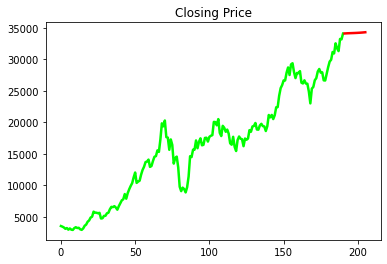

In [100]:
plt.plot(final_data['Closing Price'][:191],linewidth = 2.5,color='lime',label='actual')
plt.plot(final_data['Closing Price'][191:],linewidth = 2.5,color='red',label='actual')
plt.title('Closing Price')

The forcasting outcomes seem to maintain a constant flow(or slightly more or less).

Text(0.5, 1.0, 'Gold Price')

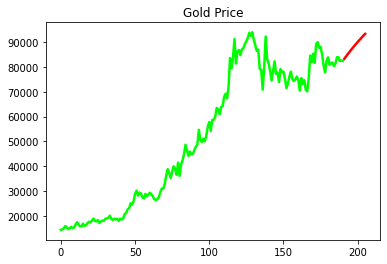

In [101]:
plt.plot(final_data['Gold Price'][:191],linewidth = 2.5,color='lime',label='actual')
plt.plot(final_data['Gold Price'][191:],linewidth = 2.5,color='red',label='actual')
plt.title('Gold Price')

The forcasting outcomes seem to maintain a linearly increasing flow.

Text(0.5, 1.0, 'Oil Price')

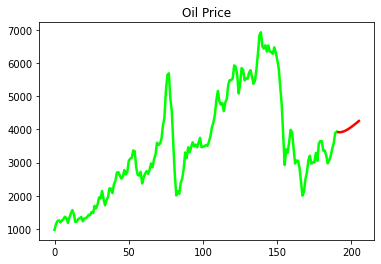

In [102]:
plt.plot(final_data['Oil Price'][:191],linewidth = 2.5,color='lime',label='actual')
plt.plot(final_data['Oil Price'][191:],linewidth = 2.5,color='red',label='actual')
plt.title('Oil Price')

The forcasting outcomes seem to maintain an exponentially increasing flow.

Text(0.5, 1.0, 'M3 Price')

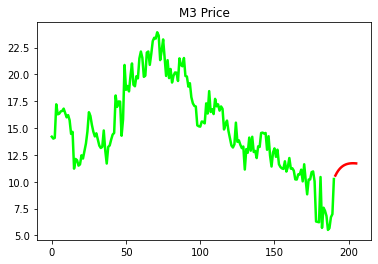

In [103]:
plt.plot(final_data['M3'][:191],linewidth = 2.5,color='lime',label='actual')
plt.plot(final_data['M3'][191:],linewidth = 2.5,color='red',label='actual')
plt.title('M3 Price')

The forcasting outcomes seem to maintain an logarithic increasing flow.

Text(0.5, 1.0, 'Exchange Rate')

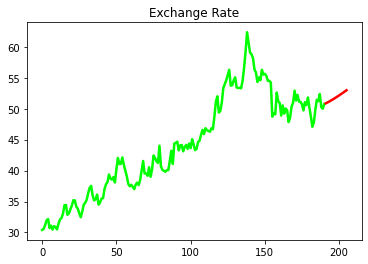

In [104]:
plt.plot(final_data['Exchange Rate'][:191],linewidth = 2.5,color='lime',label='actual')
plt.plot(final_data['Exchange Rate'][191:],linewidth = 2.5,color='red',label='actual')
plt.title('Exchange Rate')

The forcasting outcomes seem to maintain a linearly increasing flow.

Text(0.5, 1.0, 'Interest Rate')

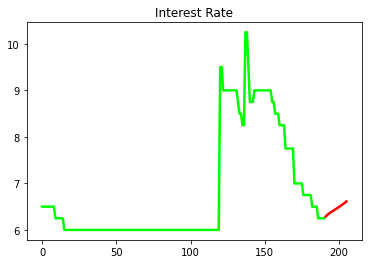

In [105]:
plt.plot(final_data['Interest Rate'][:191],linewidth = 2.5,color='lime',label='actual')
plt.plot(final_data['Interest Rate'][191:],linewidth = 2.5,color='red',label='actual')
plt.title('Interest Rate')

The forcasting outcomes seem to maintain a linearly increasing flow.